In [23]:
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from src.preprocess import *

5


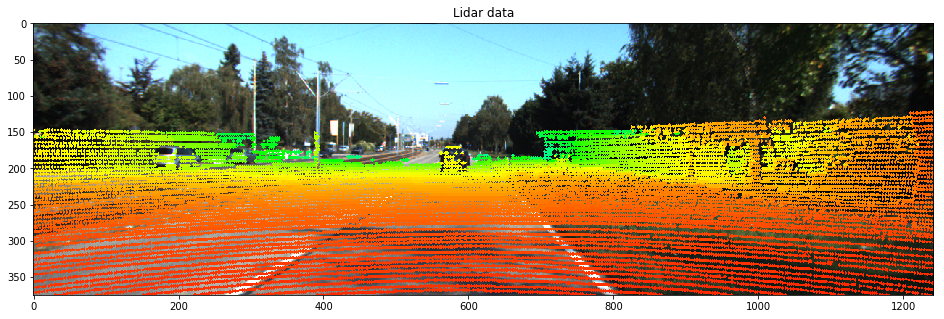

In [25]:
import random
dset = '/data/KITTI/KITTI_RAW/2011_09_26/2011_09_26_drive_0015_sync/'
idx = 5#random.randint(0, 100)
im = mpimg.imread(dset + 'image_03/data/' + "{:010}".format(idx) + '.png')
c = '/data/KITTI/KITTI_Origin/2011_09_26_drive_0015_sync_03/' + "{:010}".format(idx) + '.npy'
d = np.load(c)
show_lidar(im, d)
print(idx)

In [18]:
class KittiStereoLidar(Dataset):
    def __init__(self, left_imgs_dir, right_imgs_dir, transform=None):
        self.left_imgs_dir = left_imgs_dir
        self.right_imgs_dir = right_imgs_dir
        #self.left_gt_dir = left_gt_dir
        #self.right_gt_dir = right_gt_dir
        self.transform = transform
        
    def __getitem__(self, index):
        img_l = datasets.ImageFolder(self.left_imgs_dir[index], self.transform)
        img_r = datasets.ImageFolder(self.right_imgs_dir[index], self.transform)
        #gt_l = Image.open(self.left_gt_dir[index])
        
        #if self.transform:
        #    img1 = self.transform(img1)
        #    img2 = self.transform(img2)
            
        return img_l, img_r
    
    def __len__(self):
        return len(self.left_imgs_dir)

In [19]:
l_train_imgs = '/data/KITTI/KITTI_RAW/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/'
r_train_imgs = '/data/KITTI/KITTI_RAW/2011_09_26/2011_09_26_drive_0001_sync/image_03/data/'
l_train_gt = 'groundtruth/2011_09_26/2011_09_26_drive_0001_sync/image_02/data/'
kitti_ds = KittiStereoLidar(
    l_train_imgs, r_train_imgs, transform=transforms.ToTensor())

In [21]:
train_loader = DataLoader(dataset=kitti_ds, batch_size=10, shuffle=False)
 

In [22]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some images from X
dataiter = iter(train_loader)
# the "_" is a placeholder for no labels
images, _ = dataiter.next()

# show images
fig = plt.figure(figsize=(12, 8))
imshow(images)

KeyboardInterrupt: 

In [34]:
import matplotlib.image as mpimg
import numpy as np
import random
from src.preprocess import *
idx = 14#random.randint(0, 100)
im = mpimg.imread('/data/KITTI/KITTI_RAW/2011_09_26/2011_09_26_drive_0022_sync/' + 'image_03/data/' + "{:010}".format(idx) + '.png')
c = './groundtruth/2011_09_26/2011_09_26_drive_0022_sync/image_03/data/' + "{:010}".format(idx) + '.npy'
#d = np.genfromtxt(c, delimiter=',')
d = np.load(c)
show_lidar(im, d)
print(idx)

FileNotFoundError: [Errno 2] No such file or directory: './groundtruth/2011_09_26/2011_09_26_drive_0022_sync/image_03/data/0000000014.npy'

In [33]:
c2c_path = '/data/KITTI/KITTI_RAW/2011_09_26/calib_cam_to_cam.txt'
with open(c2c_path, "r") as f:
     c2c_file = f.readlines()

for line in c2c_file:
    (key, val) = line.split(':', 1)
    if key == ('P_rect_' + '02'):
        P_ = np.fromstring(val, sep=' ')
        P_ = P_.reshape(3, 4)
                # erase 4th column ([0,0,0])
        P_ = P_[:3, :3]

P_

array([[721.5377,   0.    , 609.5593],
       [  0.    , 721.5377, 172.854 ],
       [  0.    ,   0.    ,   1.    ]])